# Hamiltonian Decomposition

## Single-Qubit Decomposition


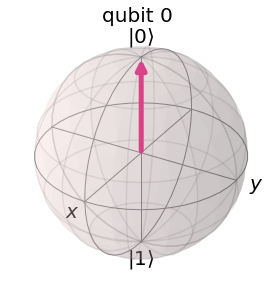

In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

#choose another initial state 
#qc.h(0)

# apply these gates in any order
qc.x(0)
qc.y(0)
qc.z(0)

out = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)
#CAPTION Creating the I-matrix from X, Y, Z
#get_ipython().run_cell_magic(u'html', u'', u'<span hidden first>Putting qubit 0 into state |+> and qubit 1 into state |-></span>')
#plot_bloch_multivector(out)

In [2]:
from collections import defaultdict
from functools import reduce
from itertools import product
import numpy as np

PAULIS = {
    "I": np.eye(2, dtype=complex),
    "X": np.array([[0, 1], [1, 0]], dtype=complex),
    "Y": np.array([[0, -1j], [1j, 0]], dtype=complex),
    "Z": np.array([[1, 0], [0, -1]], dtype=complex),
}
#CAPTION The Pauli matrices

In [3]:
def pauli_decomposition(H):
    n = int(np.log2(len(H)))
    dims = 2 ** n

    if H.shape != (dims, dims):
        raise ValueError("The input must be a 2^n x 2^n dimensional matrix.")

    basis_key = ["".join(k) for k in product(PAULIS.keys(), repeat=n)]
    components = defaultdict(int)

    for i, val in enumerate(product(PAULIS.values(), repeat=n)):
        basis_mat = reduce(np.kron, val)
        coeff = H.reshape(-1).dot(basis_mat.reshape(-1)) / dims
        coeff = np.real_if_close(coeff).item()
        
        if not np.allclose(coeff, 0):
            components[basis_key[i]] = coeff

    return components
#CAPTION Decomposing the Hermitian into Pauli matrices

In [4]:
pauli_decomposition(np.array([[3, 1], [1, 2]], dtype=complex))
#CAPTION The result of the decomposition

defaultdict(int, {'I': 2.5, 'X': 1.0, 'Z': 0.5})

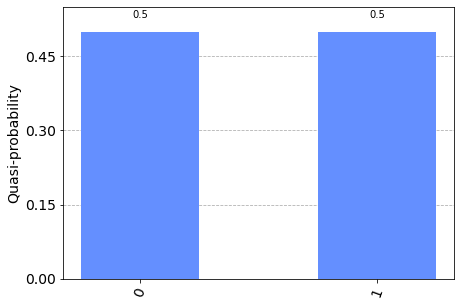

In [5]:
from math import pi

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

#qc.ry(pi/2, 0)
# or
qc.h(0)

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 

# Do the simulation, returning the result
result = execute(qc,backend, shots=1000).result()

# Get the data and display histogram
counts = result.get_counts()
plot_histogram(counts)
#CAPTION Measuring in the X-direction

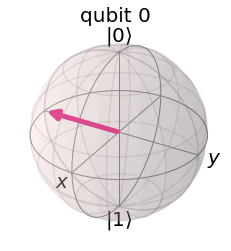

In [6]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

#qc.rx(pi/2, 0)
# or
qc.h(0)
qc.sdg(0)

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 

# Get the data and display histogram
out = execute(qc,Aer.get_backend('statevector_simulator')).result().get_statevector()
plot_bloch_multivector(out)
#CAPTION Measuring in the Y-direction

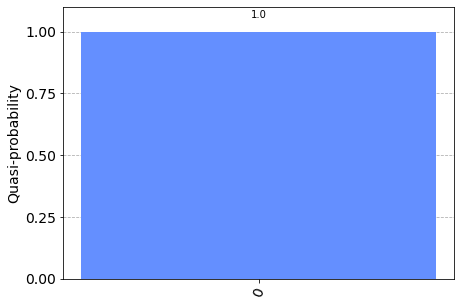

In [7]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 

# Do the simulation, returning the result
result = execute(qc,backend, shots=1000).result()

# Get the data and display histogram
counts = result.get_counts()
plot_histogram(counts)
#CAPTION Measuring in the Z-direction

In [8]:
qc = QuantumCircuit(1)

qc.z(0)

backend = Aer.get_backend('unitary_simulator')
result = execute(qc,backend, shots=1000).result()

print(result.get_unitary(qc,2))
#CAPTION The matrix of the Z-direction

Operator([[ 1.+0.j,  0.+0.j],
          [-0.+0.j, -1.+0.j]],
         input_dims=(2,), output_dims=(2,))


## Two-Qubit Decomposition


In [9]:
pauli_decomposition(np.array([[1, 3, 1, 3], [3, 0,0,0], [1,0,1,3], [3,0,3,0]], dtype=complex))
#CAPTION The components of a 4x4 matrix
import json
print(json.dumps(pauli_decomposition(np.array([[1, 3, 1, 3], [3, 0,0,0], [1,0,1,3], [3,0,3,0]], dtype=complex)),sort_keys=False, indent=4))

{
    "II": 0.5,
    "IX": 3.0,
    "IZ": 0.5,
    "XI": 0.5,
    "XX": 1.5,
    "XZ": 0.5,
    "YY": -1.5
}


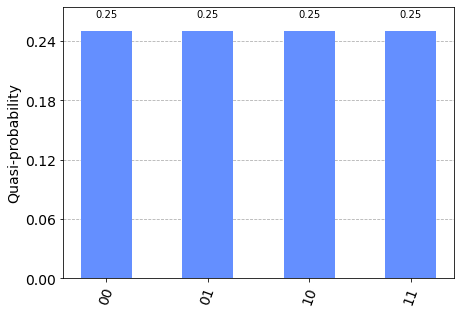

In [10]:
# Create a quantum circuit with two qubits
qc = QuantumCircuit(2)

# apply the XX observable
qc.h(0)
qc.h(1)

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('statevector_simulator') 

# Do the simulation, returning the result
result = execute(qc,backend, shots=1000).result()

# Get the data and display histogram
counts = result.get_counts()
plot_histogram(counts)
#CAPTION The XX observable

In [11]:
qc = QuantumCircuit(2)

qc.z(1)
qc.z(0)

backend = Aer.get_backend('unitary_simulator')
result = execute(qc,backend, shots=1000).result()
print(result.get_unitary(qc,2))
#CAPTION The matrix of the ZZ observable

Operator([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
          [-0.+0.j, -1.+0.j, -0.+0.j, -0.+0.j],
          [-0.+0.j, -0.+0.j, -1.+0.j, -0.+0.j],
          [ 0.-0.j,  0.-0.j,  0.-0.j,  1.-0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


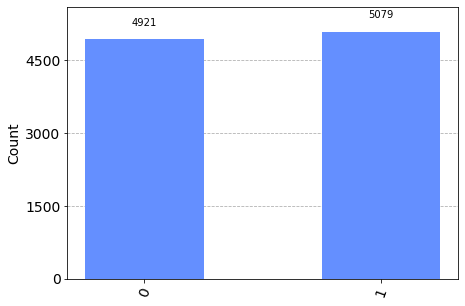

In [12]:
from qiskit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(2, "qr")
cr = ClassicalRegister(1, "cr")
qc = QuantumCircuit(qr, cr)

qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.measure(qr[1],cr[0])

backend = Aer.get_backend('qasm_simulator')
result = execute(qc,backend, shots=10000).result()

counts = result.get_counts()
plot_histogram(counts)
#CAPTION Measuring in the XX direction

In [13]:
np.kron(PAULIS["I"],PAULIS["X"])
#CAPTION The tensor product of IX

array([[0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]])

In [14]:
np.kron(PAULIS["X"],PAULIS["I"])
#CAPTION The tensor product of XI

array([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]])

Now, let's compare them with the result in Qiskit.

In [15]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(2)

qc.i(0)
qc.x(1)

backend = Aer.get_backend('unitary_simulator')
result = execute(qc,backend, shots=1000).result()

print(result.get_unitary(qc,2))
#CAPTION The matrix of XI in Qiskit

Operator([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [16]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(2)

qc.x(0)
qc.i(1)

backend = Aer.get_backend('unitary_simulator')
result = execute(qc,backend, shots=1000).result()

print(result.get_unitary(qc,2))
#CAPTION The matrix of IX in Qiskit

Operator([[0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


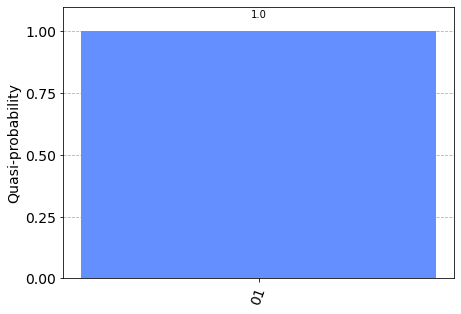

In [17]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result()

counts = result.get_counts()
plot_histogram(counts)
#CAPTION The resulting state of IX

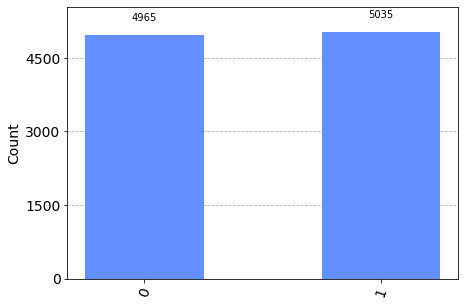

In [18]:
qr = QuantumRegister(2, "qr")
cr = ClassicalRegister(1, "cr")
qc = QuantumCircuit(qr, cr)

qc.h(0)
qc.i(1)
qc.measure(qr[0],cr[0])

backend = Aer.get_backend('qasm_simulator')
result = execute(qc,backend, shots=10000).result()

counts = result.get_counts()
plot_histogram(counts)
#CAPTION Measuring in the IX direction

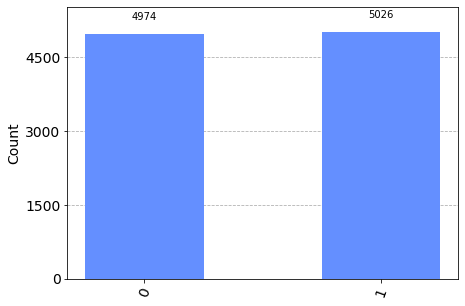

In [19]:
qr = QuantumRegister(2, "qr")
cr = ClassicalRegister(1, "cr")
qc = QuantumCircuit(qr, cr)

qc.h(0)
qc.i(1)
qc.swap(0,1)
qc.measure(qr[1],cr[0])

backend = Aer.get_backend('qasm_simulator')
result = execute(qc,backend, shots=10000).result()

counts = result.get_counts()
plot_histogram(counts)
#CAPTION Measuring in the IX direction using Swap

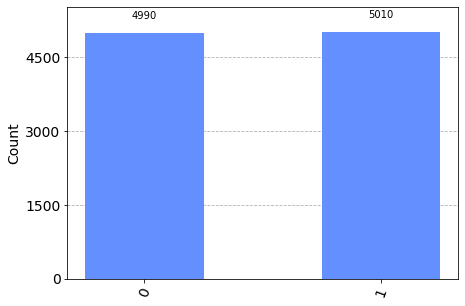

In [20]:
qr = QuantumRegister(2, "qr")
cr = ClassicalRegister(1, "cr")
qc = QuantumCircuit(qr, cr)

qc.i(0)
qc.h(1)
qc.measure(qr[1],cr[0])

backend = Aer.get_backend('qasm_simulator')
result = execute(qc,backend, shots=10000).result()

counts = result.get_counts()
plot_histogram(counts)
#CAPTION Measuring in the XI direction

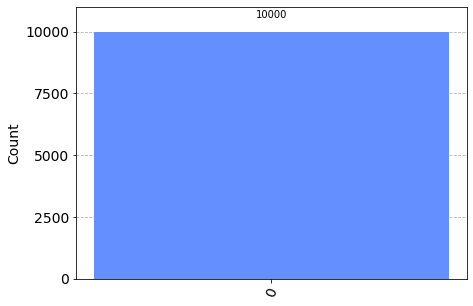

In [21]:
qr = QuantumRegister(2, "qr")
cr = ClassicalRegister(1, "cr")
qc = QuantumCircuit(qr, cr)

qc.swap(0,1)
qc.measure(qr[1],cr[0])

backend = Aer.get_backend('qasm_simulator')
result = execute(qc,backend, shots=10000).result()

counts = result.get_counts()
plot_histogram(counts)
#CAPTION Measuring in the IZ direction

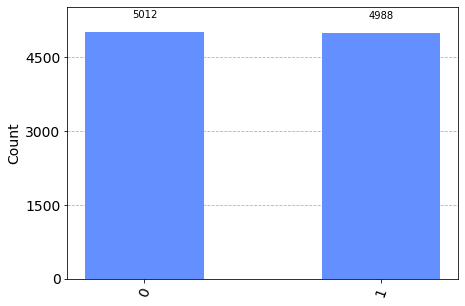

In [22]:
qr = QuantumRegister(2, "qr")
cr = ClassicalRegister(1, "cr")
qc = QuantumCircuit(qr, cr)

qc.h(1)
qc.cx(0,1)
qc.measure(qr[1],cr[0])

backend = Aer.get_backend('qasm_simulator')
result = execute(qc,backend, shots=10000).result()

counts = result.get_counts()
plot_histogram(counts)
#CAPTION Measuring in the XZ direction

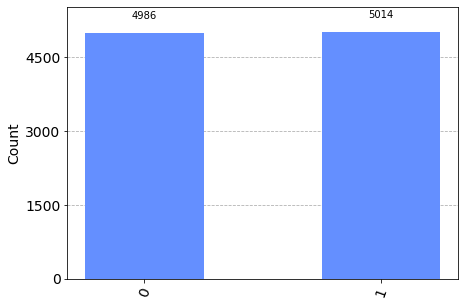

In [23]:
qr = QuantumRegister(2, "qr")
cr = ClassicalRegister(1, "cr")
qc = QuantumCircuit(qr, cr)

qc.h(0)
qc.sdg(0)

qc.h(1)
qc.sdg(1)

qc.cx(0,1)
qc.measure(qr[1],cr[0])

backend = Aer.get_backend('qasm_simulator')
result = execute(qc,backend, shots=10000).result()

counts = result.get_counts()
plot_histogram(counts)
#CAPTION Measuring in the YY direction

## Multi-Qubit Decomposition


In [25]:
def matrix_decomposition_circuits(H):
    n = int(np.log2(len(H)))
    dims = 2 ** n

    if H.shape != (dims, dims):
        raise ValueError("The input must be a 2^n x 2^n dimensional matrix.")

    components = pauli_decomposition(H)
    
    circuits = {}
    for (paulistring, weight) in components.items():
        paulis = list(enumerate(reversed(paulistring)))
        
        qr = QuantumRegister(n, "qr")
        cr = ClassicalRegister(1, "cr")
        qc = QuantumCircuit(qr, cr)

        # don't do anything if all Paulis are I
        if all(x[1] == "I" for x in paulis):
            # we use this empty circuit that we will measure as "0" (eigenvalue 1) in all cases
            circuits[paulistring] = (qc, weight)
            continue
        
        # do the single qubit transformations
        for idx, letter in paulis:
            if letter == "X":
                qc.h(qr[idx])
            elif letter == "Y":
                qc.h(qr[idx])
                qc.sdg(qr[idx])
                
        # add the inter-qubit gates
        for idx, (first, second) in enumerate(zip(paulis, paulis[1:])):
            if second[1] == "I":
                qc.swap(first[0], second[0])
            elif first[1] != "I":
                paulis[idx+1] = (paulis[idx+1][0], paulis[idx][1])
                qc.cx(first[0], second[0])
            
        # measure the highest qubit
        qc.measure(qr[-1], cr[0])
        circuits[paulistring] = (qc, weight)
        
    return circuits
#CAPTION Decomposing the Hermitian into quantum circuits 

In [26]:
circuits = matrix_decomposition_circuits(np.array([[1, 3, 1, 3], [3, 0,0,0], [1,0,1,3], [3,0,3,0]], dtype=complex))
circuits
#CAPTION Decomposition of a 4x4 matrix
d = {}
for item in circuits.items():
    d[item[0]] = ("QuantumCircuit object", item[1][1])
d

{'II': ('QuantumCircuit object', 0.5),
 'IX': ('QuantumCircuit object', 3.0),
 'IZ': ('QuantumCircuit object', 0.5),
 'XI': ('QuantumCircuit object', 0.5),
 'XX': ('QuantumCircuit object', 1.5),
 'XZ': ('QuantumCircuit object', 0.5),
 'YY': ('QuantumCircuit object', -1.5)}

In [27]:
circuits = matrix_decomposition_circuits(np.array(
    [[1,3,1,3,2,2,1,1],
     [3,0,0,0,1,2,1,1],
     [1,0,1,3,3,3,1,1],
     [3,0,3,0,0,0,1,1],
     [2,1,3,0,1,1,1,1],
     [2,2,3,0,1,1,1,1],
     [1,1,1,1,1,1,1,1],
     [1,1,1,1,1,1,1,1]], dtype=complex))
circuits
#CAPTION Decomposition of a 8x8 matrix
d = {}
for item in circuits.items():
    d[item[0]] = ("QuantumCircuit object", item[1][1])
d

{'III': ('QuantumCircuit object', 0.75),
 'IIX': ('QuantumCircuit object', 2.0),
 'IIZ': ('QuantumCircuit object', 0.25),
 'IXI': ('QuantumCircuit object', 0.75),
 'IXX': ('QuantumCircuit object', 1.25),
 'IXZ': ('QuantumCircuit object', 0.25),
 'IYY': ('QuantumCircuit object', -0.75),
 'XII': ('QuantumCircuit object', 1.5),
 'XIX': ('QuantumCircuit object', 1.25),
 'XXI': ('QuantumCircuit object', 1.25),
 'XXX': ('QuantumCircuit object', 1.25),
 'XXZ': ('QuantumCircuit object', 0.75),
 'XYY': ('QuantumCircuit object', 0.75),
 'XZI': ('QuantumCircuit object', 0.5),
 'XZX': ('QuantumCircuit object', 0.25),
 'YIY': ('QuantumCircuit object', -0.25),
 'YXY': ('QuantumCircuit object', -0.75),
 'YYI': ('QuantumCircuit object', 0.25),
 'YYX': ('QuantumCircuit object', 0.25),
 'YYZ': ('QuantumCircuit object', 0.75),
 'YZY': ('QuantumCircuit object', -0.25),
 'ZII': ('QuantumCircuit object', -0.25),
 'ZIX': ('QuantumCircuit object', 1.0),
 'ZIZ': ('QuantumCircuit object', 0.25),
 'ZXI': ('Quant

In [28]:
circuits["IXZ"][0].draw()
#CAPTION Drawing the IXZ circuit

qr_0: ───────■────────
      ┌───┐┌─┴─┐      
qr_1: ┤ H ├┤ X ├─X────
      └───┘└───┘ │ ┌─┐
qr_2: ───────────X─┤M├
                   └╥┘
  cr: ══════════════╩═

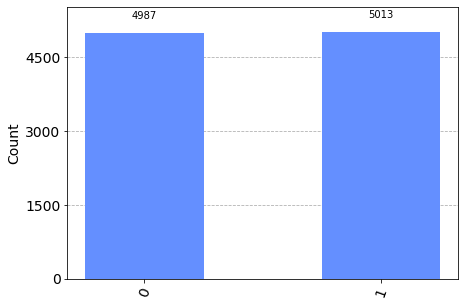

In [29]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuits["IXZ"][0], backend, shots=10000).result()

counts = result.get_counts()
plot_histogram(counts)
#CAPTION Measuring in the IXZ direction